<a href="https://colab.research.google.com/github/mariadelcar18/Deliverable_9_Draft/blob/main/Deliverable_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# 1. I have decided to do a regression to predict the median_house_value based on the median_income and total_rooms 
#    using the california_housing database

In [33]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/california_housing.csv')
df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


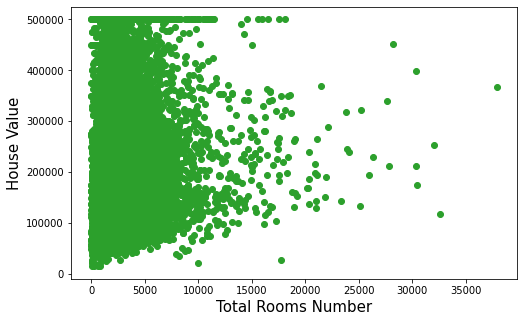

In [29]:
# Understanding the impact of total rooms number in the house value
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.scatter(x = df['total_rooms'], y = df['median_house_value'], color = 'Tab:green')
plt.xlabel('Total Rooms Number', fontsize = 15)
plt.ylabel('House Value', fontsize = 15)
plt.show()

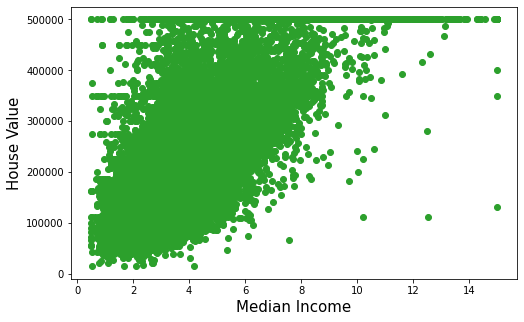

In [31]:
# Understanding the impact of median income in the house value
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 5))
plt.scatter(x = df['median_income'], y = df['median_house_value'], color = 'Tab:green')
plt.xlabel('Median Income', fontsize = 15)
plt.ylabel('House Value', fontsize = 15)
plt.show()

In [34]:
# 2. Data Splitting 
from sklearn.model_selection import train_test_split

In [35]:
features = ['median_income', 'total_rooms'] 
X = df[features] 
Y = df['median_house_value']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [37]:
# 3. Model Selection
from sklearn.linear_model import LinearRegression
my_linear_regression = LinearRegression()

# 3. Model Fitting
my_linear_regression.fit(X_train, Y_train)

LinearRegression()

In [38]:
print("R^2 =", my_linear_regression.score(X_train, Y_train))

R^2 = 0.47436193127267245


In [47]:
print('The intercept (b_0) is  {}'.format(my_linear_regression.intercept_))
for i in range(len(features)):
  print('The coef (b_{}) is  {}'.format(i+1, my_linear_regression.coef_[i]))

The intercept (b_0) is  45306.9511381741
The coef (b_1) is  41848.22802540213
The coef (b_2) is  -0.22524255892190112


In [48]:
# 3. Evaluate Model
median_house_value_pred = my_linear_regression.predict(X_test)
median_house_value_pred

array([212355.91785231,  93813.23628221, 157419.92545125, ...,
        95232.00944206, 117954.14283152, 199824.86446376])

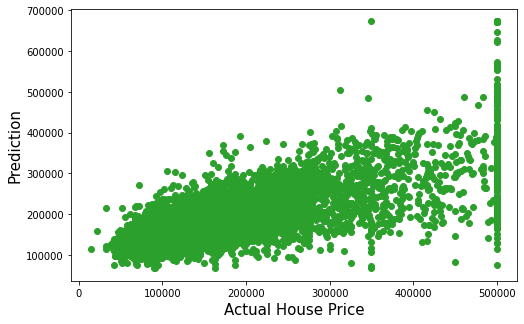

In [49]:
plt.figure(figsize = (8, 5))
plt.scatter(x = Y_test, y = median_house_value_pred, color = 'Tab:green')
plt.xlabel('Actual House Price', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [41]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, median_house_value_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, median_house_value_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, median_house_value_pred)))

Mean Absolute Error: 62900.61790386801
Mean Squared Error: 6937597200.588116
Root Mean Squared Error: 83292.23973809394


In [50]:
def MAPE(Y, pred): # MAPE: Mean Abs Percentage Error
  l1 = list(Y)
  l2 = list(pred)
  er = []
  for i in range(len(l1)):
    e = np.abs(l1[i]-l2[i])
    er.append(e/l1[i])
  return np.mean(er)
  print('MAPE:', MAPE(Y_test, median_house_value_pred)*100, "%")

In [51]:
 print('MAPE:', MAPE(Y_test, median_house_value_pred)*100, "%")

MAPE: 38.26279988791212 %


In [ ]:
# 4. Final remarks 